In [1]:
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np

# 구역별 정리
#### 권역별 데이터 정리 csv 는 data.데이터정리 폴더에 전체_권역별_데이터라는 이름으로 저장

In [2]:
df = pd.read_csv('../data/zone.csv')
df.head()

,날짜,년,월,일,시,구이름,권역,기온(°C),강수량(mm),날씨,날씨_리스트,강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,강남구,동남권,1.7,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,0.0,36.298658,1708.4
1,2017-01-01,2017,1,1,1,강남구,동남권,1.4,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,0.0,34.514040,1815.7
2,2017-01-01,2017,1,1,2,강남구,동남권,1.2,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,1.0,35.041178,1104.1
3,2017-01-01,2017,1,1,3,강남구,동남권,0.5,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,2.0,37.128855,844.3
4,2017-01-01,2017,1,1,4,강남구,동남권,0.6,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,1.0,38.630438,759.3


In [3]:
df = df.groupby(['날짜','년','월','일','시','권역']).mean().reset_index()
df.head()

,날짜,년,월,일,시,권역,기온(°C),강수량(mm),강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,도심권,1.233333,0.0,False,0.0,0.333333,31.642987,993.871083
1,2017-01-01,2017,1,1,0,동남권,1.350000,0.0,False,0.0,0.500000,35.037179,1352.685069
2,2017-01-01,2017,1,1,0,동북권,0.950000,0.0,False,0.0,0.375000,30.777178,1341.727778
3,2017-01-01,2017,1,1,0,서남권,1.300000,0.0,False,0.0,0.285714,34.125789,977.771062
4,2017-01-01,2017,1,1,0,서북권,0.833333,0.0,False,0.0,0.000000,31.521646,1520.666667


In [4]:
df.to_csv('../../../data/데이터정리/전체_권역별_데이터.csv', index=False)

# 강설일 기준 강설량 -> 시간별

In [5]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())
path = '/home/jongsky/anaconda3/envs/python_3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

설정 파일 위치:  /home/jongsky/anaconda3/envs/python_3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
NanumGothic Eco


In [7]:
df['날짜'] = df['날짜'].map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date())

In [8]:
df.isnull().sum()

날짜              0
년               0
월               0
일               0
시               0
권역              0
기온(°C)         27
강수량(mm)        25
강설량_체크          0
계산된적설량(cm)     25
교통사고수           0
차량통행속도        265
교통량           216
dtype: int64

In [9]:
df_도심권 = df[df.권역 == '도심권'].reset_index(drop=True)
df_동남권 = df[df.권역 == '동남권'].reset_index(drop=True)
df_동북권 = df[df.권역 == '동북권'].reset_index(drop=True)
df_서남권 = df[df.권역 == '서남권'].reset_index(drop=True)
df_서북권 = df[df.권역 == '서북권'].reset_index(drop=True)

## 도심권

In [10]:
df_도심권.head()

,날짜,년,월,일,시,권역,기온(°C),강수량(mm),강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,도심권,1.233333,0.0,False,0.0,0.333333,31.642987,993.871083
1,2017-01-01,2017,1,1,1,도심권,1.433333,0.0,False,0.0,0.333333,28.188683,981.193732
2,2017-01-01,2017,1,1,2,도심권,1.033333,0.0,False,0.0,0.000000,28.124563,611.801282
3,2017-01-01,2017,1,1,3,도심권,1.033333,0.0,False,0.0,0.666667,31.816060,471.964387
4,2017-01-01,2017,1,1,4,도심권,1.333333,0.0,False,0.0,0.333333,33.927185,384.500712


In [11]:
select_df = df_도심권

In [12]:
snow_day_list = select_df[select_df['강설량_체크']==True].날짜.unique()

zero_data = np.zeros((360,2))
zero_df = pd.DataFrame(zero_data, columns=['기온(°C)','계산된적설량(cm)'])

for i in snow_day_list:
    df = select_df[(select_df['날짜']<=i + timedelta(days=7))& (i - timedelta(days=7) <= select_df['날짜'])][['기온(°C)','계산된적설량(cm)']].reset_index(drop=True)
    zero_df = zero_df.add(df, fill_value=0)
    
zero_df = zero_df/len(snow_day_list)

day_list = []
time_list = []
day_time_list = []
day = -8

for d in range(15):
    day = day+1
    for t in range(24):
        day_list.append(day)
        time_list.append(t)
        day_time_list.append(str(day)+'일_'+str(t)+'시')

zero_df['day'] = day_list
zero_df['time'] = time_list
zero_df['day_time'] = day_time_list

group_zero_df = zero_df.groupby(['day']).mean().reset_index()[['day','기온(°C)','계산된적설량(cm)']]

In [13]:
zero_df.head()

,기온(°C),계산된적설량(cm),day,time,day_time
0,-1.867296,0.028302,-7,0,-7일_0시
1,-2.152830,0.006289,-7,1,-7일_1시
2,-2.382075,0.000000,-7,2,-7일_2시
3,-2.599686,0.000000,-7,3,-7일_3시
4,-2.815094,0.000000,-7,4,-7일_4시


In [14]:
group_zero_df.head()

,day,기온(°C),계산된적설량(cm)
0,-7,-1.221135,0.004848
1,-6,-1.603695,0.019785
2,-5,-1.700144,0.013889
3,-4,-1.338640,0.002686
4,-3,-0.408124,0.001769


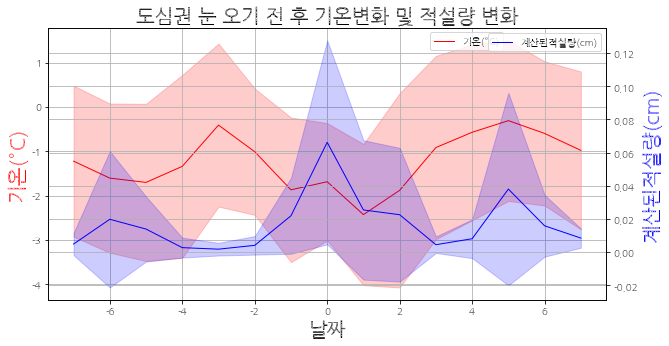

In [16]:
ax = sns.lineplot(x="day", y="기온(°C)", data=zero_df, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="day", y="계산된적설량(cm)", data=zero_df, color='b', ci='sd',label='계산된적설량(cm)')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("도심권 눈 오기 전 후 기온변화 및 적설량 변화", fontsize=20,color='black')

ax.set_xlabel('날짜', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("계산된적설량(cm)",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설일_기준_구역별_온도_강설량/도심권_graph_change_std.png')

## 동남권

In [17]:
df_동남권.head()

,날짜,년,월,일,시,권역,기온(°C),강수량(mm),강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,동남권,1.350,0.0,False,0.0,0.50,35.037179,1352.685069
1,2017-01-01,2017,1,1,1,동남권,0.900,0.0,False,0.0,0.25,33.766722,1427.560417
2,2017-01-01,2017,1,1,2,동남권,0.475,0.0,False,0.0,1.75,34.232624,893.531944
3,2017-01-01,2017,1,1,3,동남권,0.000,0.0,False,0.0,0.50,36.285573,668.963889
4,2017-01-01,2017,1,1,4,동남권,-0.300,0.0,False,0.0,0.50,37.842492,604.562847


In [18]:
select_df = df_동남권

In [19]:
snow_day_list = select_df[select_df['강설량_체크']==True].날짜.unique()

zero_data = np.zeros((360,2))
zero_df = pd.DataFrame(zero_data, columns=['기온(°C)','계산된적설량(cm)'])

for i in snow_day_list:
    df = select_df[(select_df['날짜']<=i + timedelta(days=7))& (i - timedelta(days=7) <= select_df['날짜'])][['기온(°C)','계산된적설량(cm)']].reset_index(drop=True)
    zero_df = zero_df.add(df, fill_value=0)
    
zero_df = zero_df/len(snow_day_list)

day_list = []
time_list = []
day_time_list = []
day = -8

for d in range(15):
    day = day+1
    for t in range(24):
        day_list.append(day)
        time_list.append(t)
        day_time_list.append(str(day)+'일_'+str(t)+'시')

zero_df['day'] = day_list
zero_df['time'] = time_list
zero_df['day_time'] = day_time_list

group_zero_df = zero_df.groupby(['day']).mean().reset_index()[['day','기온(°C)','계산된적설량(cm)']]

In [20]:
zero_df.head()

,기온(°C),계산된적설량(cm),day,time,day_time
0,-0.502830,0.009434,-7,0,-7일_0시
1,-0.866981,0.021226,-7,1,-7일_1시
2,-1.177830,0.000000,-7,2,-7일_2시
3,-1.485849,0.000000,-7,3,-7일_3시
4,-1.761792,0.000000,-7,4,-7일_4시


In [21]:
group_zero_df.head()

,day,기온(°C),계산된적설량(cm)
0,-7,0.232901,0.004914
1,-6,-0.162244,0.026042
2,-5,-0.249803,0.015428
3,-4,-0.016274,0.002457
4,-3,0.820715,0.001376


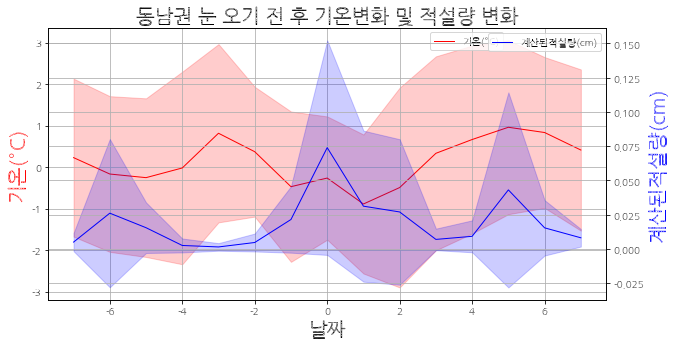

In [22]:
ax = sns.lineplot(x="day", y="기온(°C)", data=zero_df, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="day", y="계산된적설량(cm)", data=zero_df, color='b', ci='sd',label='계산된적설량(cm)')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("동남권 눈 오기 전 후 기온변화 및 적설량 변화", fontsize=20,color='black')

ax.set_xlabel('날짜', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("계산된적설량(cm)",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설일_기준_구역별_온도_강설량/동남권_graph_change_std.png')

## 동북권

In [23]:
df_동북권.head()

,날짜,년,월,일,시,권역,기온(°C),강수량(mm),강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,동북권,0.9500,0.0,False,0.0,0.375,30.777178,1341.727778
1,2017-01-01,2017,1,1,1,동북권,0.8000,0.0,False,0.0,0.125,29.786502,1395.905556
2,2017-01-01,2017,1,1,2,동북권,0.3000,0.0,False,0.0,0.125,29.928623,928.269444
3,2017-01-01,2017,1,1,3,동북권,-0.1500,0.0,False,0.0,0.125,31.971969,707.572222
4,2017-01-01,2017,1,1,4,동북권,-0.3875,0.0,False,0.0,0.000,33.457189,639.183333


In [24]:
select_df = df_동북권

In [25]:
snow_day_list = select_df[select_df['강설량_체크']==True].날짜.unique()

zero_data = np.zeros((360,2))
zero_df = pd.DataFrame(zero_data, columns=['기온(°C)','계산된적설량(cm)'])

for i in snow_day_list:
    df = select_df[(select_df['날짜']<=i + timedelta(days=7))& (i - timedelta(days=7) <= select_df['날짜'])][['기온(°C)','계산된적설량(cm)']].reset_index(drop=True)
    zero_df = zero_df.add(df, fill_value=0)
    
zero_df = zero_df/len(snow_day_list)

day_list = []
time_list = []
day_time_list = []
day = -8

for d in range(15):
    day = day+1
    for t in range(24):
        day_list.append(day)
        time_list.append(t)
        day_time_list.append(str(day)+'일_'+str(t)+'시')

zero_df['day'] = day_list
zero_df['time'] = time_list
zero_df['day_time'] = day_time_list

group_zero_df = zero_df.groupby(['day']).mean().reset_index()[['day','기온(°C)','계산된적설량(cm)']]

In [26]:
zero_df.head()

,기온(°C),계산된적설량(cm),day,time,day_time
0,-1.020047,0.010950,-7,0,-7일_0시
1,-1.309906,0.003538,-7,1,-7일_1시
2,-1.627830,0.002358,-7,2,-7일_2시
3,-1.926887,0.000000,-7,3,-7일_3시
4,-2.215094,0.000000,-7,4,-7일_4시


In [27]:
group_zero_df.head()

,day,기온(°C),계산된적설량(cm)
0,-7,-0.178865,0.003945
1,-6,-0.545108,0.019310
2,-5,-0.648126,0.013726
3,-4,-0.459178,0.002702
4,-3,0.377001,0.001376


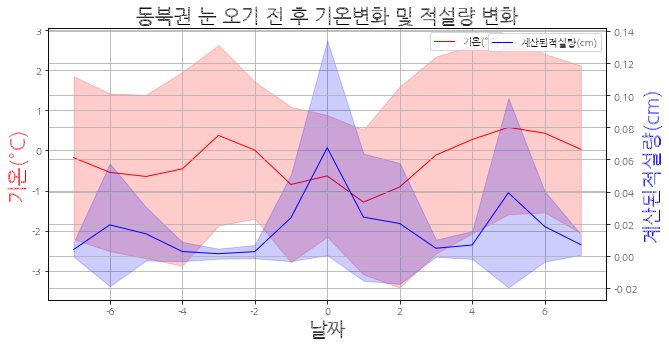

In [28]:
ax = sns.lineplot(x="day", y="기온(°C)", data=zero_df, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="day", y="계산된적설량(cm)", data=zero_df, color='b', ci='sd',label='계산된적설량(cm)')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("동북권 눈 오기 전 후 기온변화 및 적설량 변화", fontsize=20,color='black')

ax.set_xlabel('날짜', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("계산된적설량(cm)",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설일_기준_구역별_온도_강설량/동북권_graph_change_std.png')

## 서남권

In [29]:
df_서남권.head()

,날짜,년,월,일,시,권역,기온(°C),강수량(mm),강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,서남권,1.300000,0.0,False,0.0,0.285714,34.125789,977.771062
1,2017-01-01,2017,1,1,1,서남권,1.300000,0.0,False,0.0,0.000000,33.012988,1059.479945
2,2017-01-01,2017,1,1,2,서남권,0.871429,0.0,False,0.0,0.142857,32.961913,703.324451
3,2017-01-01,2017,1,1,3,서남권,0.585714,0.0,False,0.0,0.000000,35.068174,503.712912
4,2017-01-01,2017,1,1,4,서남권,0.128571,0.0,False,0.0,0.428571,36.943293,458.848443


In [30]:
select_df = df_서남권

In [31]:
snow_day_list = select_df[select_df['강설량_체크']==True].날짜.unique()

zero_data = np.zeros((360,2))
zero_df = pd.DataFrame(zero_data, columns=['기온(°C)','계산된적설량(cm)'])

for i in snow_day_list:
    df = select_df[(select_df['날짜']<=i + timedelta(days=7))& (i - timedelta(days=7) <= select_df['날짜'])][['기온(°C)','계산된적설량(cm)']].reset_index(drop=True)
    zero_df = zero_df.add(df, fill_value=0)
    
zero_df = zero_df/len(snow_day_list)

day_list = []
time_list = []
day_time_list = []
day = -8

for d in range(15):
    day = day+1
    for t in range(24):
        day_list.append(day)
        time_list.append(t)
        day_time_list.append(str(day)+'일_'+str(t)+'시')

zero_df['day'] = day_list
zero_df['time'] = time_list
zero_df['day_time'] = day_time_list

group_zero_df = zero_df.groupby(['day']).mean().reset_index()[['day','기온(°C)','계산된적설량(cm)']]

In [32]:
zero_df.head()

,기온(°C),계산된적설량(cm),day,time,day_time
0,-1.114286,0.021563,-7,0,-7일_0시
1,-1.380323,0.009434,-7,1,-7일_1시
2,-1.684367,0.000000,-7,2,-7일_2시
3,-1.936119,0.000000,-7,3,-7일_3시
4,-2.180054,0.000000,-7,4,-7일_4시


In [33]:
group_zero_df.head()

,day,기온(°C),계산된적설량(cm)
0,-7,-0.251462,0.005279
1,-6,-0.582658,0.024671
2,-5,-0.741350,0.015779
3,-4,-0.473115,0.002022
4,-3,0.408586,0.002134


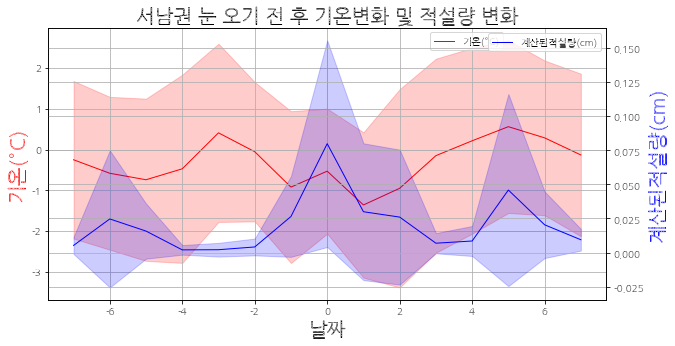

In [34]:
ax = sns.lineplot(x="day", y="기온(°C)", data=zero_df, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="day", y="계산된적설량(cm)", data=zero_df, color='b', ci='sd',label='계산된적설량(cm)')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("서남권 눈 오기 전 후 기온변화 및 적설량 변화", fontsize=20,color='black')

ax.set_xlabel('날짜', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("계산된적설량(cm)",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설일_기준_구역별_온도_강설량/서남권_graph_change_std.png')

## 서북권

In [35]:
df_서북권.head()

,날짜,년,월,일,시,권역,기온(°C),강수량(mm),강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,서북권,0.833333,0.0,False,0.0,0.0,31.521646,1520.666667
1,2017-01-01,2017,1,1,1,서북권,0.633333,0.0,False,0.0,0.0,29.868246,1634.805556
2,2017-01-01,2017,1,1,2,서북권,-0.066667,0.0,False,0.0,0.0,29.863527,1038.680556
3,2017-01-01,2017,1,1,3,서북권,-0.166667,0.0,False,0.0,0.0,32.340580,772.555556
4,2017-01-01,2017,1,1,4,서북권,-0.533333,0.0,False,0.0,0.0,34.071547,717.166667


In [36]:
select_df = df_서북권

In [37]:
snow_day_list = select_df[select_df['강설량_체크']==True].날짜.unique()

zero_data = np.zeros((360,2))
zero_df = pd.DataFrame(zero_data, columns=['기온(°C)','계산된적설량(cm)'])

for i in snow_day_list:
    df = select_df[(select_df['날짜']<=i + timedelta(days=7))& (i - timedelta(days=7) <= select_df['날짜'])][['기온(°C)','계산된적설량(cm)']].reset_index(drop=True)
    zero_df = zero_df.add(df, fill_value=0)
    
zero_df = zero_df/len(snow_day_list)

day_list = []
time_list = []
day_time_list = []
day = -8

for d in range(15):
    day = day+1
    for t in range(24):
        day_list.append(day)
        time_list.append(t)
        day_time_list.append(str(day)+'일_'+str(t)+'시')

zero_df['day'] = day_list
zero_df['time'] = time_list
zero_df['day_time'] = day_time_list

group_zero_df = zero_df.groupby(['day']).mean().reset_index()[['day','기온(°C)','계산된적설량(cm)']]

In [38]:
zero_df.head()

,기온(°C),계산된적설량(cm),day,time,day_time
0,-2.247484,0.028302,-7,0,-7일_0시
1,-2.567925,0.000000,-7,1,-7일_1시
2,-2.880818,0.003145,-7,2,-7일_2시
3,-3.181761,0.000000,-7,3,-7일_3시
4,-3.416981,0.000000,-7,4,-7일_4시


In [39]:
group_zero_df.head()

,day,기온(°C),계산된적설량(cm)
0,-7,-1.125642,0.004717
1,-6,-1.487002,0.015527
2,-5,-1.662697,0.016903
3,-4,-1.382193,0.001965
4,-3,-0.434578,0.001310


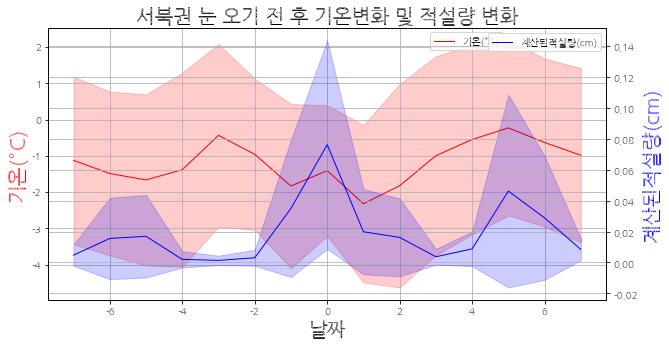

In [40]:
ax = sns.lineplot(x="day", y="기온(°C)", data=zero_df, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="day", y="계산된적설량(cm)", data=zero_df, color='b', ci='sd',label='계산된적설량(cm)')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("서북권 눈 오기 전 후 기온변화 및 적설량 변화", fontsize=20,color='black')

ax.set_xlabel('날짜', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("계산된적설량(cm)",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설일_기준_구역별_온도_강설량/서북권_graph_change_std.png')